# Unicorns (R)

- exploratory data analysis (EDA)

In [9]:
# Libraries
library(tidyverse)
library(readxl)
library(janitor)

In [10]:
# Data
data <- read_csv(
    file.path(r"(data\unicorn_companies.csv)"),
    skip = 0,
    col_names = TRUE,
    col_types = NULL,
    show_col_types = NULL
)

Rows: 1074 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Company, Valuation, Date Joined, Industry, City, Country/Region, Co...
dbl (1): Year Founded

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
# Display the first 10 rows of the data
data |> head(n=10)

Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic"
Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Matrix Partners"
Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST Global"
Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & Byers, Collaborative Fund"
JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management


In [12]:
# Get the shape
df_shape <- dim(data)
print(sprintf("The df has %d rows and %d columns.", df_shape[1], df_shape[2]))

[1] "The df has 1074 rows and 10 columns."


In [13]:
# List of columns
data_cols <- colnames(data)
data_cols_str <- paste(data_cols, collapse = ", ")
cat("List of columns:", data_cols_str)

List of columns: Company, Valuation, Date Joined, Industry, City, Country/Region, Continent, Year Founded, Funding, Select Investors

In [14]:
# Tidy up the col names
df <- data |>
    clean_names()

df |> colnames()

[1] "company"          "valuation"        "date_joined"      "industry"        
 [5] "city"             "country_region"   "continent"        "year_founded"    
 [9] "funding"          "select_investors"

In [15]:
# Survey the data frame
df |> str()

spc_tbl_ [1,074 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ company         : chr [1:1074] "Bytedance" "SpaceX" "SHEIN" "Stripe" ...
 $ valuation       : chr [1:1074] "$180B" "$100B" "$100B" "$95B" ...
 $ date_joined     : chr [1:1074] "4/7/17" "12/1/12" "7/3/18" "1/23/14" ...
 $ industry        : chr [1:1074] "Artificial intelligence" "Other" "E-commerce & direct-to-consumer" "Fintech" ...
 $ city            : chr [1:1074] "Beijing" "Hawthorne" "Shenzhen" "San Francisco" ...
 $ country_region  : chr [1:1074] "China" "United States" "China" "United States" ...
 $ continent       : chr [1:1074] "Asia" "North America" "Asia" "North America" ...
 $ year_founded    : num [1:1074] 2012 2002 2008 2010 2005 ...
 $ funding         : chr [1:1074] "$8B" "$7B" "$2B" "$2B" ...
 $ select_investors: chr [1:1074] "Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group" "Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures" "Tiger Global Management, Sequoia Capital China, 

In [ ]:
# Fix the data types before surveying the statistics
df <- df |>
    mutate(
        # Convert valuation to floats
        valuation_bn_bool_temp = str_detect(valuation, r"(B$)"),
        valuation_val_temp = as.numeric(
            str_extract(valuation, r"(\d+\.*\d*)")
        ),
        valuation = ifelse(valuation_bn_bool_temp, valuation_val_temp * 1000, valuation_val_temp),
        # Convert date_joined to dates
        date_joined = parse_date_time(date_joined, orders = c(r"(%m/%d/%y)"), exact = TRUE),
        # Convert year_founded to integers
        year_founded = as.integer(year_founded),
        # Convert funding to floats
        funding_bn_bool_temp = str_detect(funding, r"(B$)"),
        funding_val_temp = as.numeric(
            str_extract(funding, r"(\d+\.*\d*)")
        ),
        funding = ifelse(funding_bn_bool_temp, funding_val_temp * 1000, funding_val_temp),
        # Add year_joined col
        year_joined = year(date_joined)
    ) |>
    # Group _joined cols together
    relocate(
        year_joined,
        .after = "date_joined"
    ) |>
    # Rename cols to indicate quantities in millions of USD
    rename_with(
        .cols = c("valuation", "funding"),
        .fn = ~ paste0(.x, "_mm_usd")
    ) |>
    # Discard temp cols
    select(-ends_with("_temp"))

In [17]:
# Get NA counts
df |>
    summarise(
        across(
            .cols = everything(),
            .fns = ~ sum(is.na(.x))
        )
    )

company,valuation_mm_usd,date_joined,year_joined,industry,city,country_region,continent,year_founded,funding_mm_usd,select_investors
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,16,0,0,0,12,0


In [18]:
# Survey summary statistics
df |>
    select(
        where(is.numeric),
        -c(year_joined, year_founded)
    ) |>
    summary()

 valuation_mm_usd funding_mm_usd   
 Min.   :  1000   Min.   :    0.0  
 1st Qu.:  1000   1st Qu.:  223.0  
 Median :  2000   Median :  370.0  
 Mean   :  3455   Mean   :  557.3  
 3rd Qu.:  3000   3rd Qu.:  609.2  
 Max.   :180000   Max.   :14000.0  
                  NA's   :12       

In [19]:
# Sample data
df |>
    slice_sample(n=10)

company,valuation_mm_usd,date_joined,year_joined,industry,city,country_region,continent,year_founded,funding_mm_usd,select_investors
<chr>,<dbl>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
KnowBox,1000,2019-05-30,2019,Edtech,Beijing,China,Asia,2014,306,"TAL Education Group, Legend Star, Alibaba Group"
Enflame,2000,2021-01-05,2021,Hardware,Shanghai,China,Asia,2018,472,"Tencent Holdings, Delta Capital, Redpoint Ventures China"
iTrustCapital,1000,2022-01-11,2022,Fintech,Long Beach,United States,North America,2018,128,"Left Lane Capital, Walden Venture Capital"
Cerebral,5000,2021-06-10,2021,Health,San Francisco,United States,North America,2020,462,"Oak HC/FT Partners, Artis Ventures, WestCap Group"
Alan,2000,2021-04-19,2021,Fintech,Paris,France,Europe,2016,364,"Index Ventures, Temasek, Portag3 Ventures"
Bitso,2000,2021-05-05,2021,Fintech,Mexico City,Mexico,North America,2014,378,"Pantera Capital, QED Investors, Coinbase Ventures"
UpGrad,1000,2021-08-09,2021,Edtech,Mumbai,India,Asia,2015,194,"Qualcomm Ventures, Accel, Canaan Partners"
BYTON,3000,2018-04-20,2018,Auto & transportation,Nanjing,China,Asia,2016,1000,"FAW Group, Tencent Holdings, Tus Holdings"
Games24x7,3000,2022-03-30,2022,Internet software & services,Mumbai,India,Asia,2006,75,"Tiger Global Management, The Raine Group, Malabar Investments"


In [29]:
# Compute the time it took companies to reach unicorn status
plot_df <- df |>
   mutate(years_till_joined = year_joined - year_founded) |>
   arrange(desc(years_till_joined)) |> 
   slice(1:10)

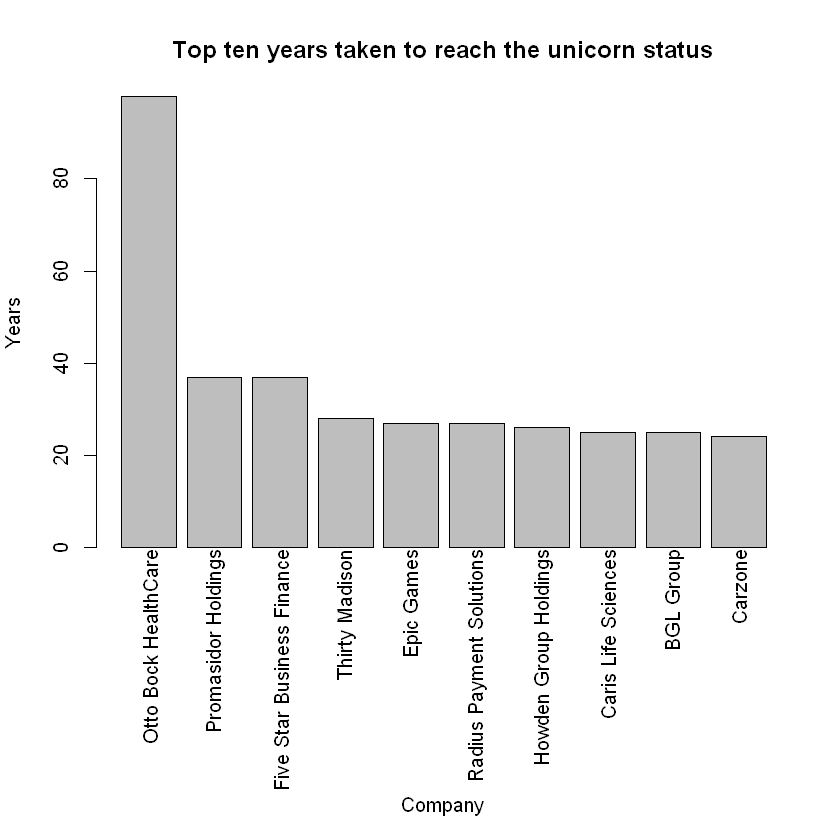

In [39]:
# Visualise the time it took companies to reach unicorn status
par(mar = c(12, 4, 4, 2))  # Increase bottom margin for rotated labels

bp <- barplot(
    plot_df$years_till_joined, 
    names.arg = "",  # Suppress default labels
    main = "Top ten years taken to reach the unicorn status",
    xlab = "", 
    ylab = "Years"
)

text(x = bp, 
     y = -0.5, 
     labels = plot_df$company, 
     xpd = TRUE, 
     srt = 90,
     adj = 1)   # Right-align
mtext("Company", side = 1, line = 10)  # Add x-axis label

In [53]:
# Compute outliers
val_quantiles <- quantile(df["valuation_mm_usd"], probs = c(0.25, 0.5, 0.75), na.rm=TRUE)
val_iqr <- val_quantiles[[3]] - val_quantiles[[1]]
outlier_bounds <- c(
    val_quantiles[1] - val_iqr * 1.5,
    val_quantiles[3] + val_iqr * 1.5
)

valuation_df <- df |>
    filter((valuation_mm_usd > outlier_bounds[1]) & (valuation_mm_usd < outlier_bounds[2]))

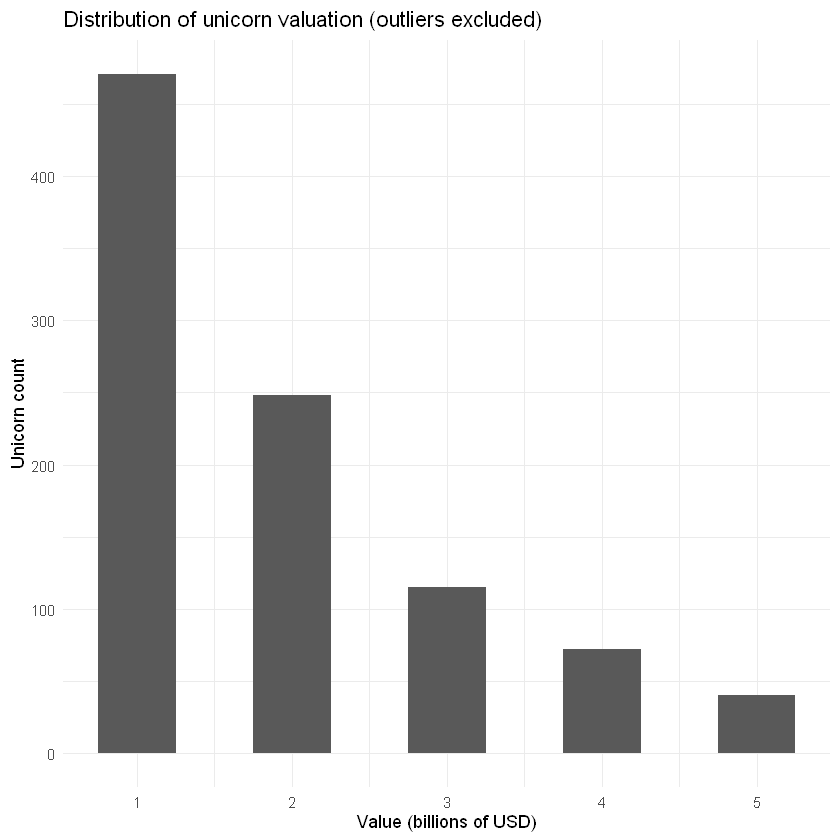

In [57]:
# Plot the valuation distribution in billions
ggplot(data = valuation_df, aes(x = valuation_mm_usd / 1000)) + 
    geom_histogram(binwidth = 0.5) +
    theme_minimal() + 
    labs(
        title="Distribution of unicorn valuation (outliers excluded)",
        x = "Value (billions of USD)",
        y = "Unicorn count"
    )